# Загружаем все необходимые библиотеки

---



In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 11.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for frozendict: filename=frozendict-2.4.2-cp311-cp311-linux_aarch64.whl size=15501 sha256=3af417b4aa1f56831a21c0513268c7a7bd14822539e676e0939209ec23323ae3
  Stored in directory: /home/jovyan/.cache/pip/wheels/b6/d6/b5/da9ad65b3c11d2d2f3245b0b2476231dc58a2a91768c5ec755
  Created wheel for pee

In [3]:
pip install tinkoff-investments

Note: you may need to restart the kernel to use updated packages.


# Загружаем все необходимые библиотеки
___

In [4]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

from datetime import timedelta

from tinkoff.invest import CandleInterval, Client
from tinkoff.invest.schemas import CandleSource
from tinkoff.invest.utils import now

# Определяем границы загружаемого датасета с Yahoo Finance

---



In [5]:
TOKEN = '<put your token here>'

In [6]:
with Client(TOKEN) as client:
    for candle in client.get_all_candles(
        instrument_id="BBG004730N88",
        from_=now() - timedelta(days=20),
        interval=CandleInterval.CANDLE_INTERVAL_DAY,
        candle_source_type=CandleSource.CANDLE_SOURCE_UNSPECIFIED,
    ):
        print(candle)

HistoricCandle(open=Quotation(units=307, nano=400000000), high=Quotation(units=307, nano=870000000), low=Quotation(units=306, nano=300000000), close=Quotation(units=307, nano=100000000), volume=1602530, time=datetime.datetime(2024, 4, 12, 0, 0, tzinfo=datetime.timezone.utc), is_complete=True, candle_source=<CandleSource.CANDLE_SOURCE_EXCHANGE: 1>)
HistoricCandle(open=Quotation(units=307, nano=470000000), high=Quotation(units=308, nano=390000000), low=Quotation(units=306, nano=640000000), close=Quotation(units=307, nano=990000000), volume=2074651, time=datetime.datetime(2024, 4, 15, 0, 0, tzinfo=datetime.timezone.utc), is_complete=True, candle_source=<CandleSource.CANDLE_SOURCE_EXCHANGE: 1>)
HistoricCandle(open=Quotation(units=308, nano=0), high=Quotation(units=308, nano=650000000), low=Quotation(units=307, nano=0), close=Quotation(units=308, nano=290000000), volume=1713585, time=datetime.datetime(2024, 4, 16, 0, 0, tzinfo=datetime.timezone.utc), is_complete=True, candle_source=<CandleS

In [7]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Определяем функцию загрузки данных

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [9]:
data = load_data('SBER.ME')
df=data
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
2610,2022-05-18,128.199997,131.300003,125.000000,125.120003,125.120003,55565940
2611,2022-05-19,125.309998,126.860001,123.209999,125.599998,125.599998,34246550
2612,2022-05-20,125.599998,125.599998,125.599998,125.599998,125.599998,0
2613,2022-05-23,125.599998,125.599998,125.599998,125.599998,125.599998,0
2614,2022-05-24,125.599998,125.599998,125.599998,125.599998,125.599998,0


In [10]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,79.000000,79.370003,75.849998,75.989998,293803296
1,76.940002,77.760002,75.099998,76.400002,272599360
2,75.000000,77.440002,74.419998,76.800003,335403040
3,76.730003,77.290001,73.820000,73.820000,177337888
4,75.400002,78.750000,73.750000,78.269997,319155936


# Визуализируем цену закрытия
___

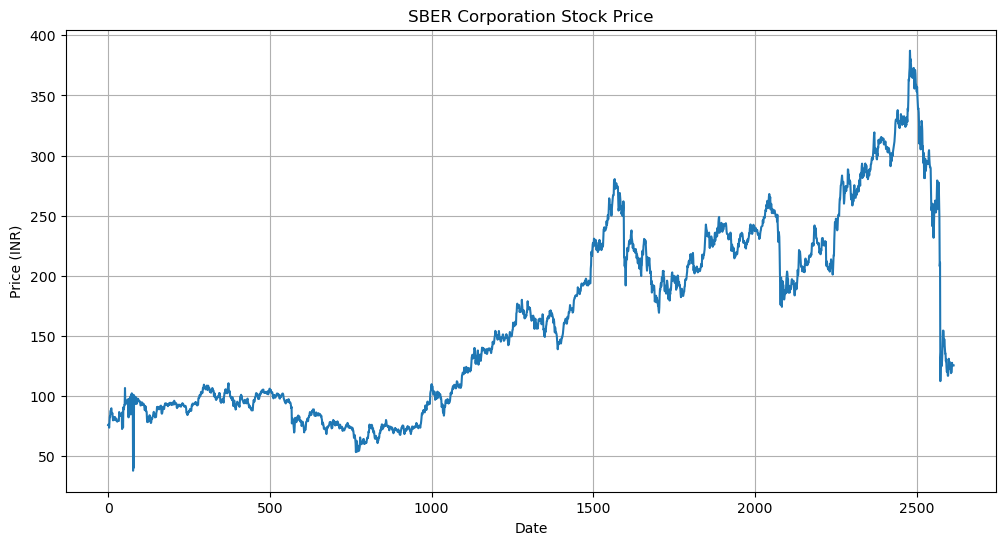

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("SBER Corporation Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [12]:
df

,Open,High,Low,Close,Volume
0,79.000000,79.370003,75.849998,75.989998,293803296
1,76.940002,77.760002,75.099998,76.400002,272599360
2,75.000000,77.440002,74.419998,76.800003,335403040
3,76.730003,77.290001,73.820000,73.820000,177337888
4,75.400002,78.750000,73.750000,78.269997,319155936
...,...,...,...,...,...
2610,128.199997,131.300003,125.000000,125.120003,55565940
2611,125.309998,126.860001,123.209999,125.599998,34246550
2612,125.599998,125.599998,125.599998,125.599998,0
2613,125.599998,125.599998,125.599998,125.599998,0


# Рисуем 100 дневную скользящую среднюю

---



In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2610    221.975001
2611    220.052201
2612    218.256200
2613    216.345800
2614    214.445200
Name: Close, Length: 2615, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

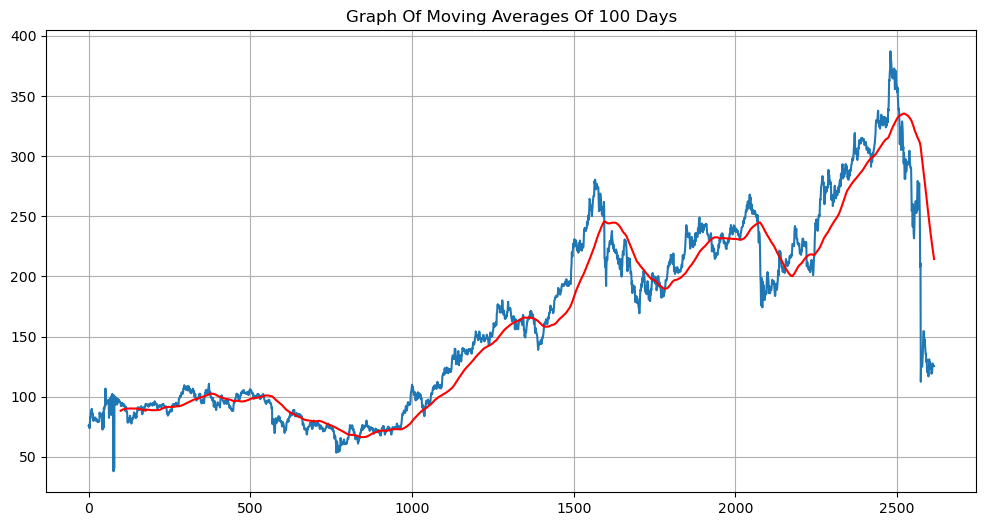

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Рисуем 200 дневную скользящую среднюю вместе со 100 дневной скользящей средней

---



In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2610    278.030051
2611    277.137401
2612    276.251401
2613    275.360051
2614    274.457351
Name: Close, Length: 2615, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

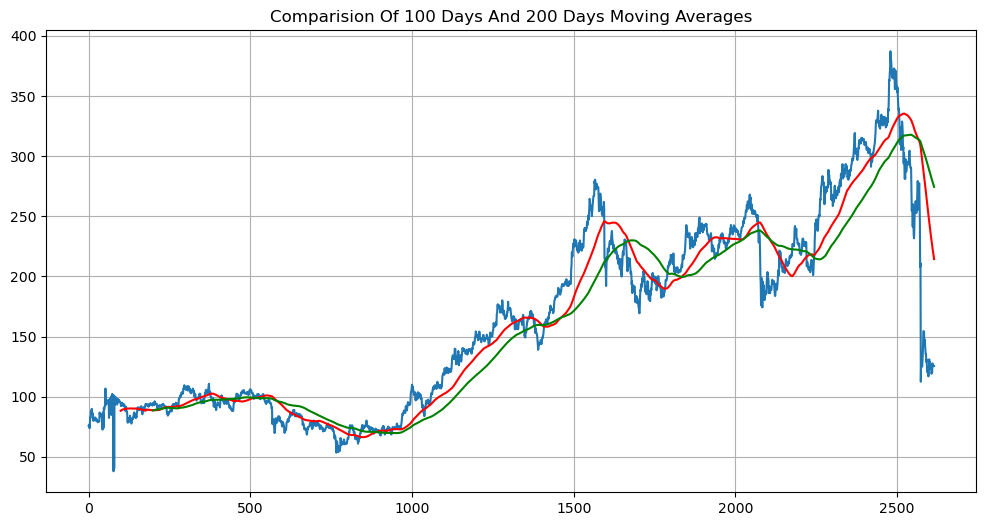

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [17]:
df.shape

(2615, 5)

# Разделение датасета на данные для обучения и теста модели
___

In [18]:
# Разделяем данные в соотношении 70% на 30%

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1830, 7)
(785, 7)


In [19]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-21,79.000000,79.370003,75.849998,75.989998,50.189579,293803296
1,2011-11-22,76.940002,77.760002,75.099998,76.400002,50.460369,272599360
2,2011-11-23,75.000000,77.440002,74.419998,76.800003,50.724556,335403040
3,2011-11-24,76.730003,77.290001,73.820000,73.820000,48.756336,177337888
4,2011-11-25,75.400002,78.750000,73.750000,78.269997,51.695454,319155936


In [20]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1830,2019-03-15,204.199997,204.949997,203.720001,204.190002,165.123413,22255810
1831,2019-03-18,204.250000,206.139999,204.110001,205.740005,166.376862,37157080
1832,2019-03-19,206.399994,208.309998,205.929993,207.369995,167.694992,43305540
1833,2019-03-20,207.600006,209.580002,206.399994,209.080002,169.077850,49905900
1834,2019-03-21,210.250000,212.289993,209.770004,210.050003,169.862259,62875460


# Применяем MinMaxScaler для нормализации данных

---



In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [24]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.15659917],
       [0.15829028],
       [0.15994013],
       ...,
       [0.68718938],
       [0.69065404],
       [0.68409592]])

In [25]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train.shape

(1730, 100, 1)

# ML Model (LSTM)

---



In [27]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [80]:
model = Sequential()
model.add(LSTM(units = 100, activation = 'tanh', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
#model.add(Dropout(0.2))


#model.add(LSTM(units = 60, activation = 'tanh', return_sequences=True))
#model.add(Dropout(0.3))


#model.add(LSTM(units = 80, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.1))


model.add(LSTM(units = 200, activation = 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 100)          40800     
                                                                 
 dropout_12 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_13 (LSTM)              (None, 200)               240800    
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 281801 (1.07 MB)
Trainable params: 281801 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Обучаем модель

---



In [82]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
55/55 [==============================] - 12s 184ms/step - loss: 0.0493 - mean_absolute_error: 0.0493
Epoch 2/10
55/55 [==============================] - 14s 249ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 3/10
55/55 [==============================] - 14s 249ms/step - loss: 0.0247 - mean_absolute_error: 0.0247
Epoch 4/10
55/55 [==============================] - 14s 250ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 5/10
55/55 [==============================] - 14s 250ms/step - loss: 0.0250 - mean_absolute_error: 0.0250
Epoch 6/10
55/55 [==============================] - 14s 249ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 7/10
55/55 [==============================] - 14s 249ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 8/10
55/55 [==============================] - 14s 249ms/step - loss: 0.0219 - mean_absolute_error: 0.0219
Epoch 9/10
55/55 [==============================] - 14s 249ms/step - loss: 0.0209 - mean_absolute_error:

In [83]:
model.save('keras_model.keras')

In [84]:
test_close.shape

(785, 1)

In [85]:
past_100_days = pd.DataFrame(train_close[-100:])

In [86]:
test_df = pd.DataFrame(test_close)

**Определение окончательного набора данных для тестирования путем включения последних 100 столбцов набора обучающих данных, чтобы получить прогноз из 1-го столбца набора тестовых данных.**

---


In [87]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [88]:
final_df.head()

,0
0,191.000000
1,183.800003
2,180.699997
3,182.009995
4,188.009995


In [89]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.28576628],
       [0.25955588],
       [0.24827082],
       [0.25303965],
       [0.27488166],
       [0.27014927],
       [0.24382961],
       [0.26607205],
       [0.26312339],
       [0.28139789],
       [0.27728429],
       [0.29159084],
       [0.31052057],
       [0.3254459 ],
       [0.32904986],
       [0.30305787],
       [0.30695305],
       [0.30600653],
       [0.31561701],
       [0.31907532],
       [0.31583542],
       [0.31121224],
       [0.29745178],
       [0.30942845],
       [0.31634507],
       [0.3087004 ],
       [0.27666544],
       [0.28587548],
       [0.282854  ],
       [0.30309425],
       [0.29668728],
       [0.3196214 ],
       [0.31488896],
       [0.30396795],
       [0.29009829],
       [0.300364  ],
       [0.28867856],
       [0.29148163],
       [0.28376408],
       [0.27910446],
       [0.26366942],
       [0.25409538],
       [0.26974883],
       [0.27793958],
       [0.27957772],
       [0.27044044],
       [0.26137605],
       [0.257

In [90]:
input_data.shape

(885, 1)

# Тестирование модели

---



In [91]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [92]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(785, 100, 1)
(785,)


## Формируем набор прогнозных значения и накладываем их на график с истинными значениями из тестовой выборки

---



In [93]:
# Making predictions

y_pred = model.predict(x_test)

25/25 [==============================] - 2s 58ms/step


In [94]:
y_pred.shape

(785, 1)

In [95]:
y_test

array([0.3337823 , 0.33942483, 0.34535854, 0.35158354, 0.35511467,
       0.34655986, 0.36661814, 0.38289038, 0.37331634, 0.37044044,
       0.37284308, 0.38310885, 0.38281762, 0.39035308, 0.39781578,
       0.41667274, 0.43421912, 0.45718963, 0.47393519, 0.46592646,
       0.45828174, 0.45613396, 0.43953404, 0.44339278, 0.43789584,
       0.43720423, 0.44743356, 0.44838002, 0.44958134, 0.41973061,
       0.40291222, 0.42337094, 0.41015651, 0.42446305, 0.43691299,
       0.43793228, 0.43316345, 0.42773933, 0.41681833, 0.4066982 ,
       0.41700036, 0.42540952, 0.42267927, 0.41659992, 0.41317799,
       0.43760466, 0.4490717 , 0.42519111, 0.44393881, 0.44958134,
       0.43935201, 0.44011645, 0.43775025, 0.43953404, 0.46396065,
       0.44958134, 0.45915544, 0.48212594, 0.49428465, 0.49690569,
       0.4491809 , 0.46592646, 0.45977429, 0.45613396, 0.47069529,
       0.46559879, 0.47906808, 0.45693483, 0.46082996, 0.45212956,
       0.46629046, 0.46596285, 0.45886421, 0.47499086, 0.46851

In [96]:
y_pred

array([[0.3567852 ],
       [0.35623792],
       [0.35659912],
       [0.3582622 ],
       [0.3612857 ],
       [0.36508587],
       [0.3673948 ],
       [0.37173238],
       [0.3789085 ],
       [0.3849374 ],
       [0.3890899 ],
       [0.39205447],
       [0.39554912],
       [0.39870587],
       [0.40239114],
       [0.40692666],
       [0.41412482],
       [0.42427242],
       [0.437938  ],
       [0.45389453],
       [0.4673238 ],
       [0.47632995],
       [0.48146567],
       [0.48129696],
       [0.4791488 ],
       [0.47542435],
       [0.4713662 ],
       [0.4693335 ],
       [0.46873596],
       [0.46916303],
       [0.46542713],
       [0.45770642],
       [0.45237115],
       [0.44689205],
       [0.4444506 ],
       [0.445798  ],
       [0.44900092],
       [0.45195562],
       [0.4535489 ],
       [0.452557  ],
       [0.448884  ],
       [0.4460296 ],
       [0.44525346],
       [0.44517812],
       [0.44453833],
       [0.4432028 ],
       [0.4455172 ],
       [0.451

In [97]:
scaler.scale_

array([0.00364033])

In [98]:
scale_factor = 1/0.00364033
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

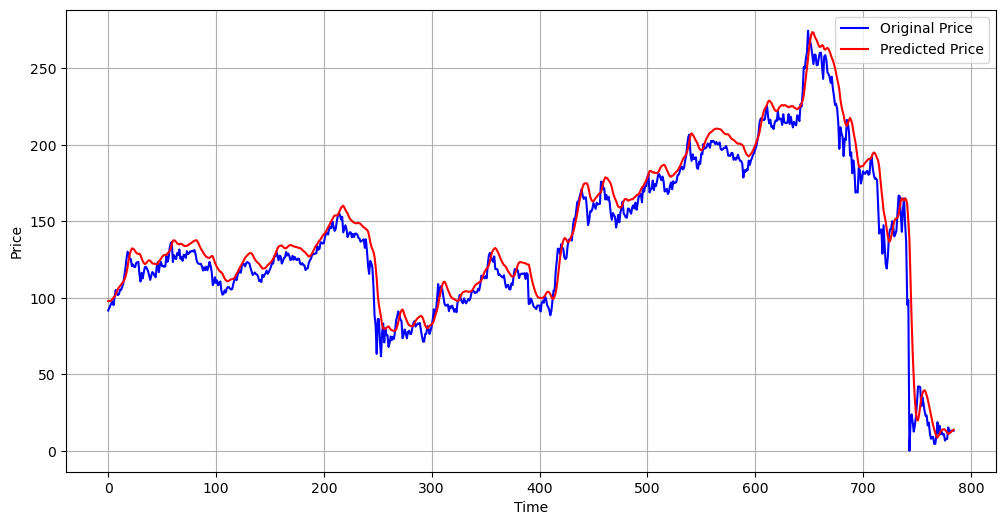

In [99]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Оценка точности модели

Расчет средней абсолютной ошибки

In [100]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 6.44%


Расчет оценки R2

In [101]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9405906834424659


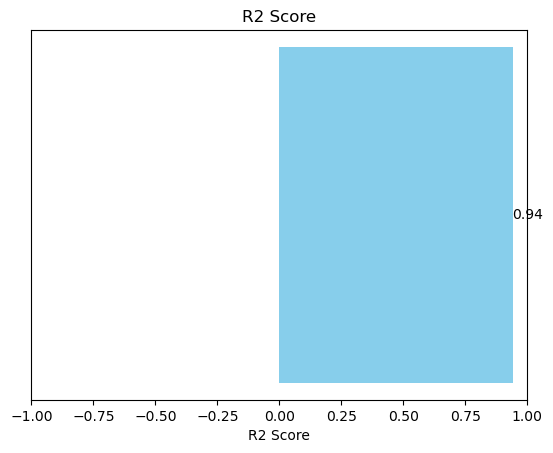

In [102]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

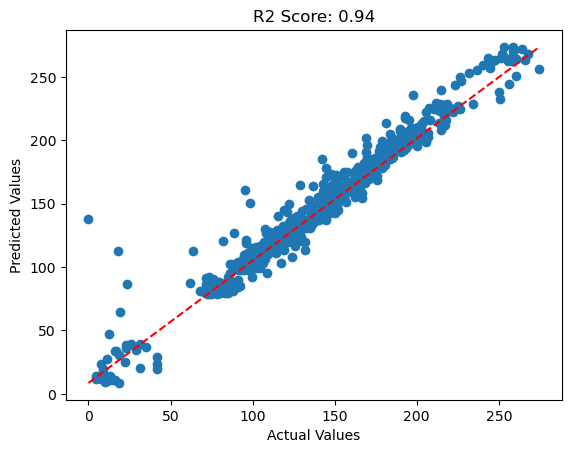

In [103]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()